In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.fft import ifft2
#
df = pd.read_csv("./midterm_data/data_midterm_problem4.csv")
print(df.head())
print(df.shape)
print("Number of missing values: ", df.isnull().sum().sum())

           V1          V2          V3          V4          V5          V6  \
0 -149.456468 -405.308546 -172.825394 -240.709119 -134.607269  110.802685   
1 -147.337357 -399.984200 -168.418445 -236.081080 -136.245803  103.824203   
2 -144.484352 -392.844438 -162.353208 -229.768232 -138.691237   94.063908   
3 -139.581587 -379.758003 -155.714514 -221.270013 -136.032979   87.750053   
4 -134.817180 -366.876922 -150.022501 -213.483202 -132.073072   83.713058   

          V7         V8          V9         V10  ...         V41        V42  \
0  17.347416  47.390445 -258.805158  152.932933  ... -129.343561 -83.326353   
1  11.757034  42.714638 -256.775665  159.535557  ... -131.482142 -81.684375   
2   3.869821  36.149228 -254.154025  169.016881  ... -134.629517 -79.442659   
3   0.652892  32.610937 -246.476743  168.345637  ... -132.354699 -76.481065   
4  -0.399032  30.726439 -238.379598  164.289211  ... -128.602303 -73.781779   

          V43         V44        V45         V46         V47  

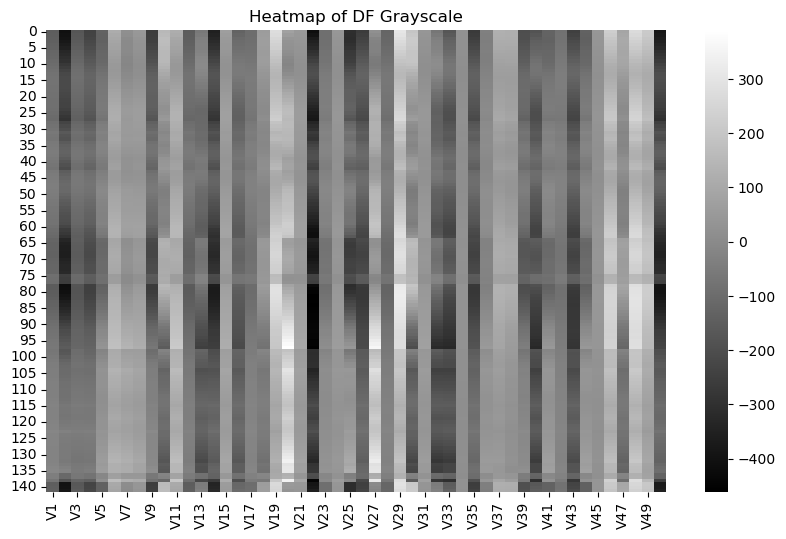

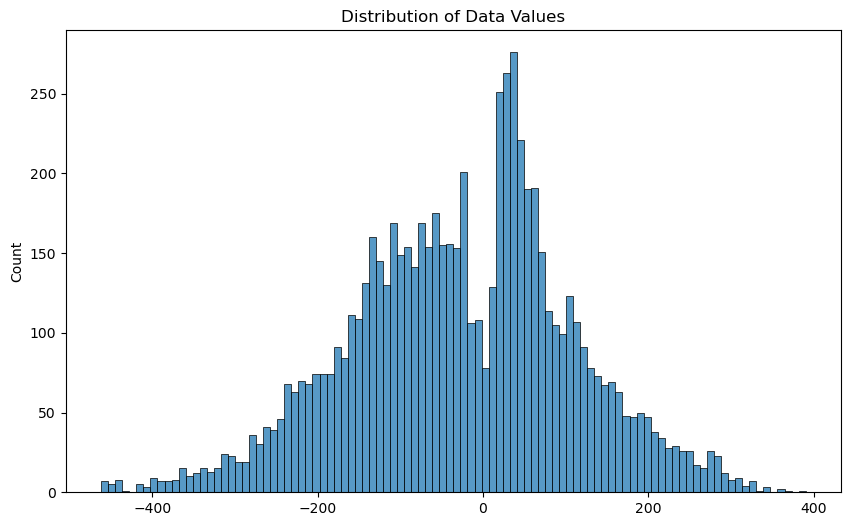

In [2]:
## Exploratory data analysis
plt.figure(figsize=(10, 6))  
sns.heatmap(df, cmap='gray', cbar=True)  

plt.title('Heatmap of DF Grayscale')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df.values.flatten(), bins=100)
plt.title('Distribution of Data Values')
plt.show()

## with hail mary fourier transform


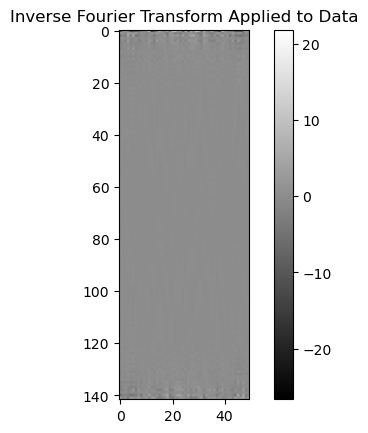

In [3]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt

# numpy data array
da = df.to_numpy()

fft_result = fft2(da)

# Apply the inverse 2D Fourier Transform
ifft_result = ifft2(da).real  # Use only the real part for visualization

# Plot the result of the inverse Fourier Transform
plt.imshow(ifft_result, cmap='gray')
plt.title('Inverse Fourier Transform Applied to Data')
plt.colorbar()
plt.show()


Since the fourier transform and inverse fourier transform did not reveal anything, we will try PCA as a means of identifying patterns within the dataset. 

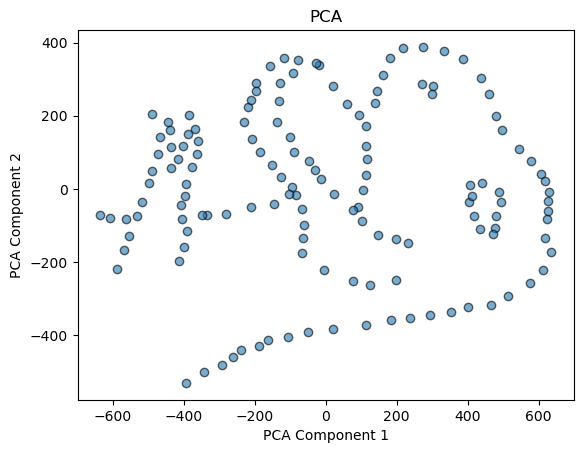

In [4]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
pca_result = pca.fit_transform(da)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6, edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA')
plt.show()



<Figure size 800x600 with 0 Axes>

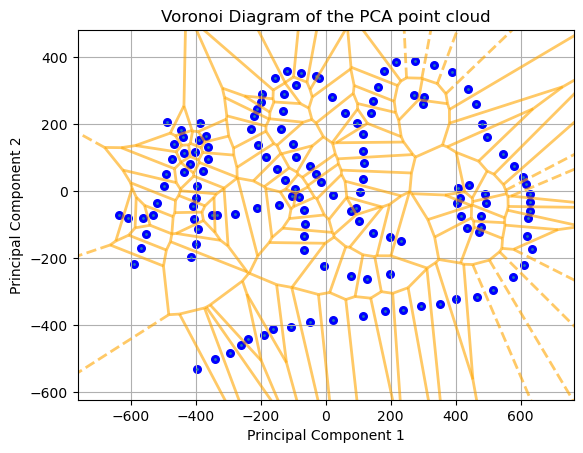

In [5]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Assuming you have 'pca_result' from the PCA earlier
vor = Voronoi(pca_result)

# Plot the Voronoi diagram
plt.figure(figsize=(8, 6))
voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)

# Overlay the PCA point cloud
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=30, c='blue', marker='o')

# Adding labels and title
plt.title('Voronoi Diagram of the PCA point cloud')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Display the plot
plt.show()


Number of components explaining 95% variance: 1


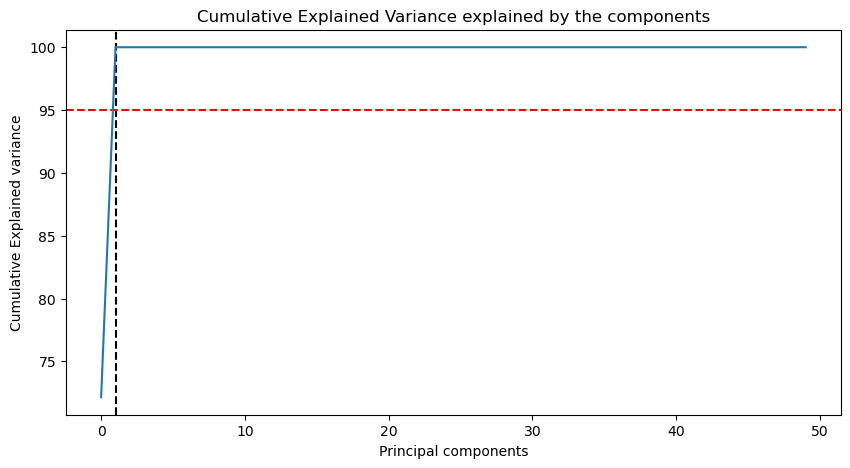

In [6]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(da)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

c:\Users\g7712_razer2\miniconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\g7712_razer2\AppData\Local\Temp\ipykernel_41416\1297780525.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(umap_result[:, 0], umap_result[:, 1], s=30, cmap='viridis')


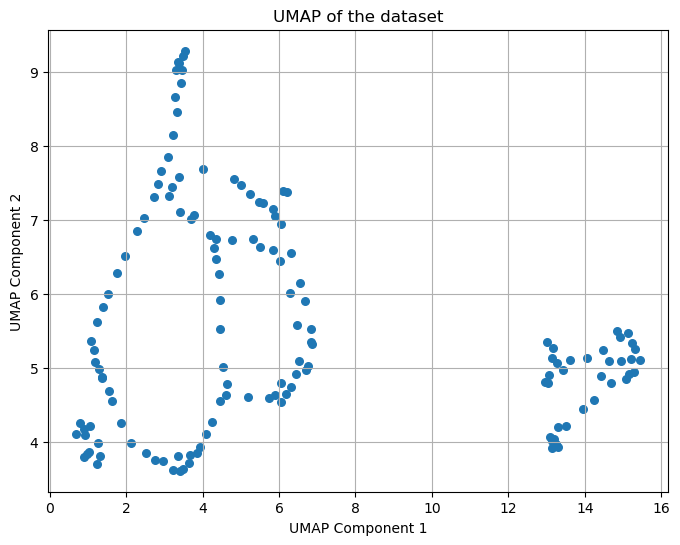

In [7]:
import umap
import matplotlib.pyplot as plt

# Perform UMAP on the dataset
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(da)

# Create a scatter plot of the UMAP result
plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1], s=30, cmap='viridis')
plt.title('UMAP of the dataset')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)
plt.show()


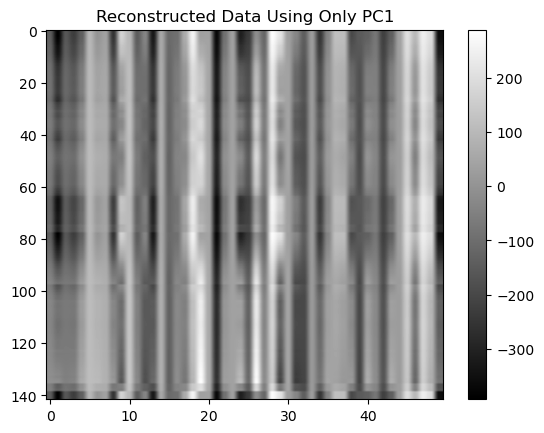

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming the data is in 'data_array'
data_array = df.to_numpy()

# Perform PCA and keep only 1 component (PC1)
pca_1 = PCA(n_components=1)
pca_result_1 = pca_1.fit_transform(data_array)

# Reconstruct the data using only PC1
reconstructed_data_pc1 = pca_1.inverse_transform(pca_result_1)

# Plot the reconstructed data (assuming it can be visualized as an image or grid)
plt.imshow(reconstructed_data_pc1, cmap='gray', aspect='auto')
plt.title('Reconstructed Data Using Only PC1')
plt.colorbar()
plt.show()



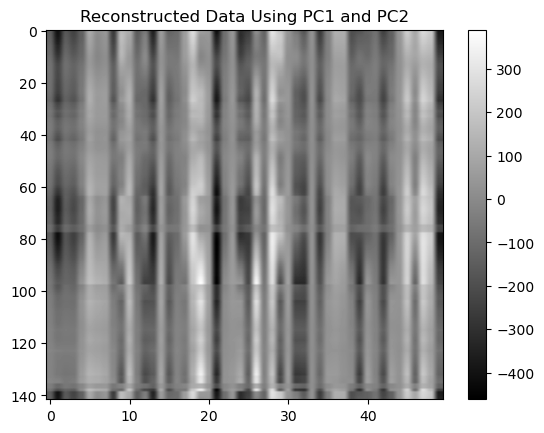

In [9]:
# Perform PCA and keep the first 2 components (PC1 and PC2)
pca_2 = PCA(n_components=2)
pca_result_2 = pca_2.fit_transform(data_array)

# Reconstruct the data using PC1 and PC2
reconstructed_data_pc2 = pca_2.inverse_transform(pca_result_2)

# Plot the reconstructed data
plt.imshow(reconstructed_data_pc2, cmap='gray', aspect='auto')
plt.title('Reconstructed Data Using PC1 and PC2')
plt.colorbar()
plt.show()


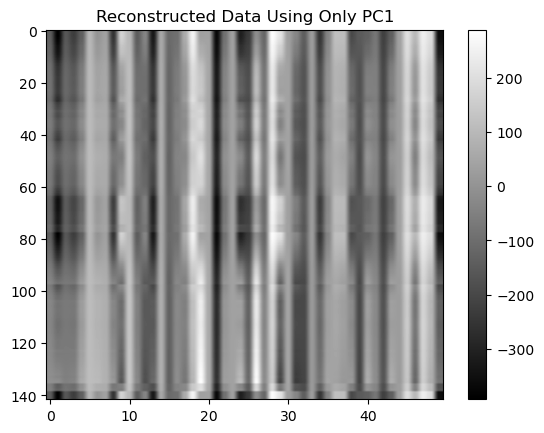

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming the DataFrame is already loaded as 'df' and converted to a NumPy array
data_array = df.to_numpy()

# Perform PCA and keep only 1 component
pca = PCA(n_components=1)
pca_result = pca.fit_transform(data_array)  # Project the data onto PC1

# Reconstruct the data using only PC1
reconstructed_data_pc1 = pca.inverse_transform(pca_result)

# Plot the reconstructed data (assuming it's possible to visualize it as an image)
plt.imshow(reconstructed_data_pc1, cmap='gray', aspect='auto')
plt.title('Reconstructed Data Using Only PC1')
plt.colorbar()
plt.show()


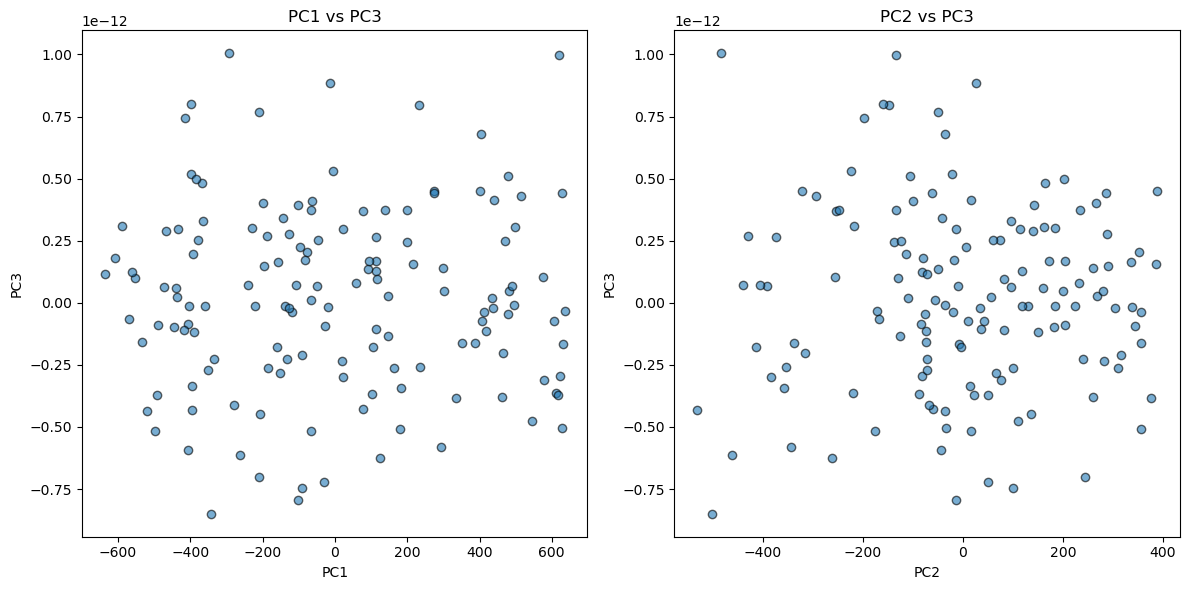

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you already have your data in a NumPy array 'data_array'
# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(da)

# Plot PC1 vs PC3
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 2], alpha=0.6, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PC1 vs PC3')

# Plot PC2 vs PC3
plt.subplot(1, 2, 2)
plt.scatter(pca_result[:, 1], pca_result[:, 2], alpha=0.6, edgecolor='k')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PC2 vs PC3')

plt.tight_layout()
plt.show()


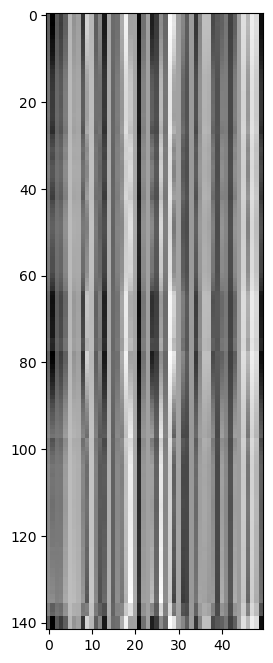

In [12]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(da))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)


## Below this is playground

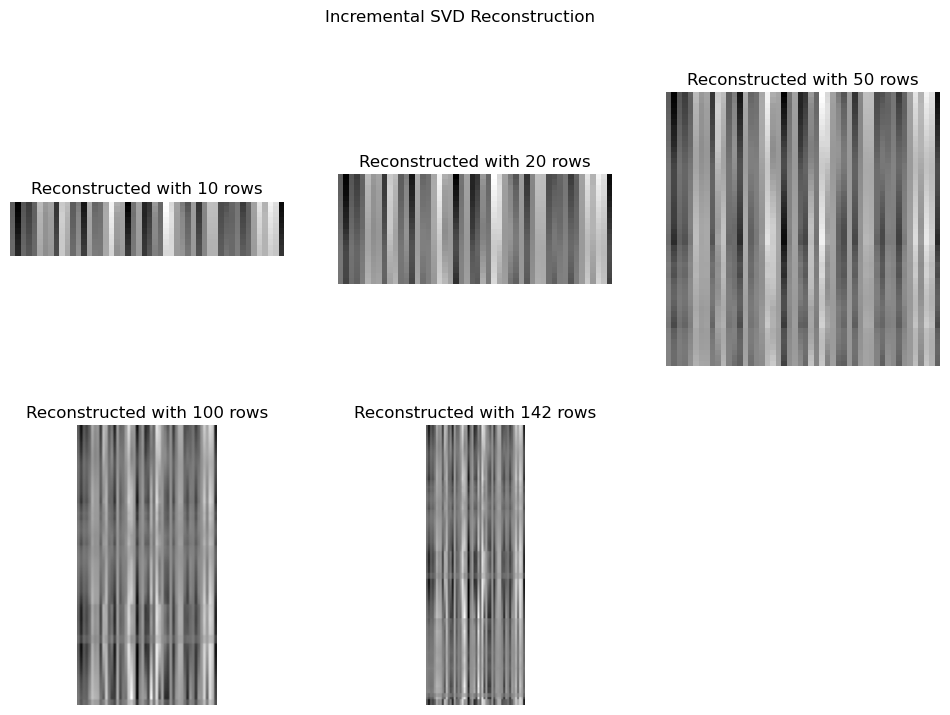

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

# Convert DataFrame to NumPy array
data_array = df.to_numpy()

# Function to perform SVD and reconstruct the image with top k singular values
def incremental_svd(data, num_rows):
    # Take the first 'num_rows' rows of the data
    data_subset = data[:num_rows, :]
    
    # Perform SVD on the subset
    U, Sigma, VT = svd(data_subset, full_matrices=False)
    
    # Reconstruct the matrix using the top k singular values
    # We can choose k based on how much data we're including
    k = min(num_rows, len(Sigma))  # Use min to avoid index out of bounds
    Sigma_k = np.diag(Sigma[:k])
    
    # Reconstruct the data with top k singular values
    reconstructed_data = U[:, :k] @ Sigma_k @ VT[:k, :]
    
    return reconstructed_data

# Incrementally increase the number of rows used for SVD
row_steps = [10, 20, 50, 100, 142]  # Define the steps in which to increase the rows

plt.figure(figsize=(12, 8))
for i, num_rows in enumerate(row_steps):
    # Perform incremental SVD
    reconstructed_data = incremental_svd(data_array, num_rows)
    
    # Plot the reconstructed data
    plt.subplot(2, 3, i+1)
    plt.imshow(reconstructed_data, cmap='gray')
    plt.title(f'Reconstructed with {num_rows} rows')
    plt.axis('off')

plt.suptitle('Incremental SVD Reconstruction')
plt.show()




          V22          V2         V50         V14         V25         V35  \
0 -413.064533 -405.308546 -382.950471 -353.062010 -306.879196 -265.983692   
1 -395.539476 -399.984200 -374.431953 -343.545289 -309.310665 -259.064349   
2 -371.157474 -392.844438 -362.754793 -330.428239 -313.042052 -249.536191   
3 -351.826313 -379.758003 -348.662193 -316.611584 -306.335623 -239.251200   
4 -337.569273 -366.876922 -336.166067 -304.935502 -297.186042 -230.478234   

          V26          V9         V43          V4  ...         V11  \
0 -258.988578 -258.805158 -248.444545 -240.709119  ...  116.460524   
1 -250.863922 -256.775665 -237.428509 -236.081080  ...  108.120104   
2 -239.624968 -254.154025 -222.091561 -229.768232  ...   96.439682   
3 -228.923139 -246.476743 -210.229028 -221.270013  ...   89.305207   
4 -220.251386 -238.379598 -201.609523 -213.483202  ...   84.968197   

          V38         V37         V10         V30         V49         V46  \
0  119.903249  125.398100  152.932933  

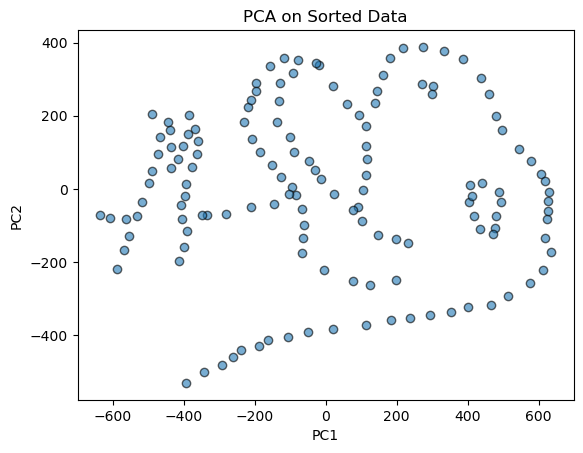

In [14]:
import pandas as pd

# Sort the DataFrame based on the first row values
# Get the first row values and sort the columns based on them
sorted_columns = df.iloc[0].sort_values().index

# Reorder the DataFrame columns based on the sorted order of the first row
df_sorted = df[sorted_columns]

# Display the sorted DataFrame
print(df_sorted.head())
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA on the sorted DataFrame
pca = PCA(n_components=2)
pca_result_sorted = pca.fit_transform(df_sorted.to_numpy())

# Plot the PCA results
plt.scatter(pca_result_sorted[:, 0], pca_result_sorted[:, 1], alpha=0.6, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA on Sorted Data')
plt.show()
